In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
file_path = r'question_3.csv'
chemical_properties_df = pd.read_csv(file_path)
chemical_properties_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [70]:
# checking if there are missing data 
null_columns = chemical_properties_df.isnull().any()
print("\nChecking if chemical_properties_df contains missing data:\n", null_columns)


Checking if chemical_properties_df contains missing data:
 fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool


# Question 3.1

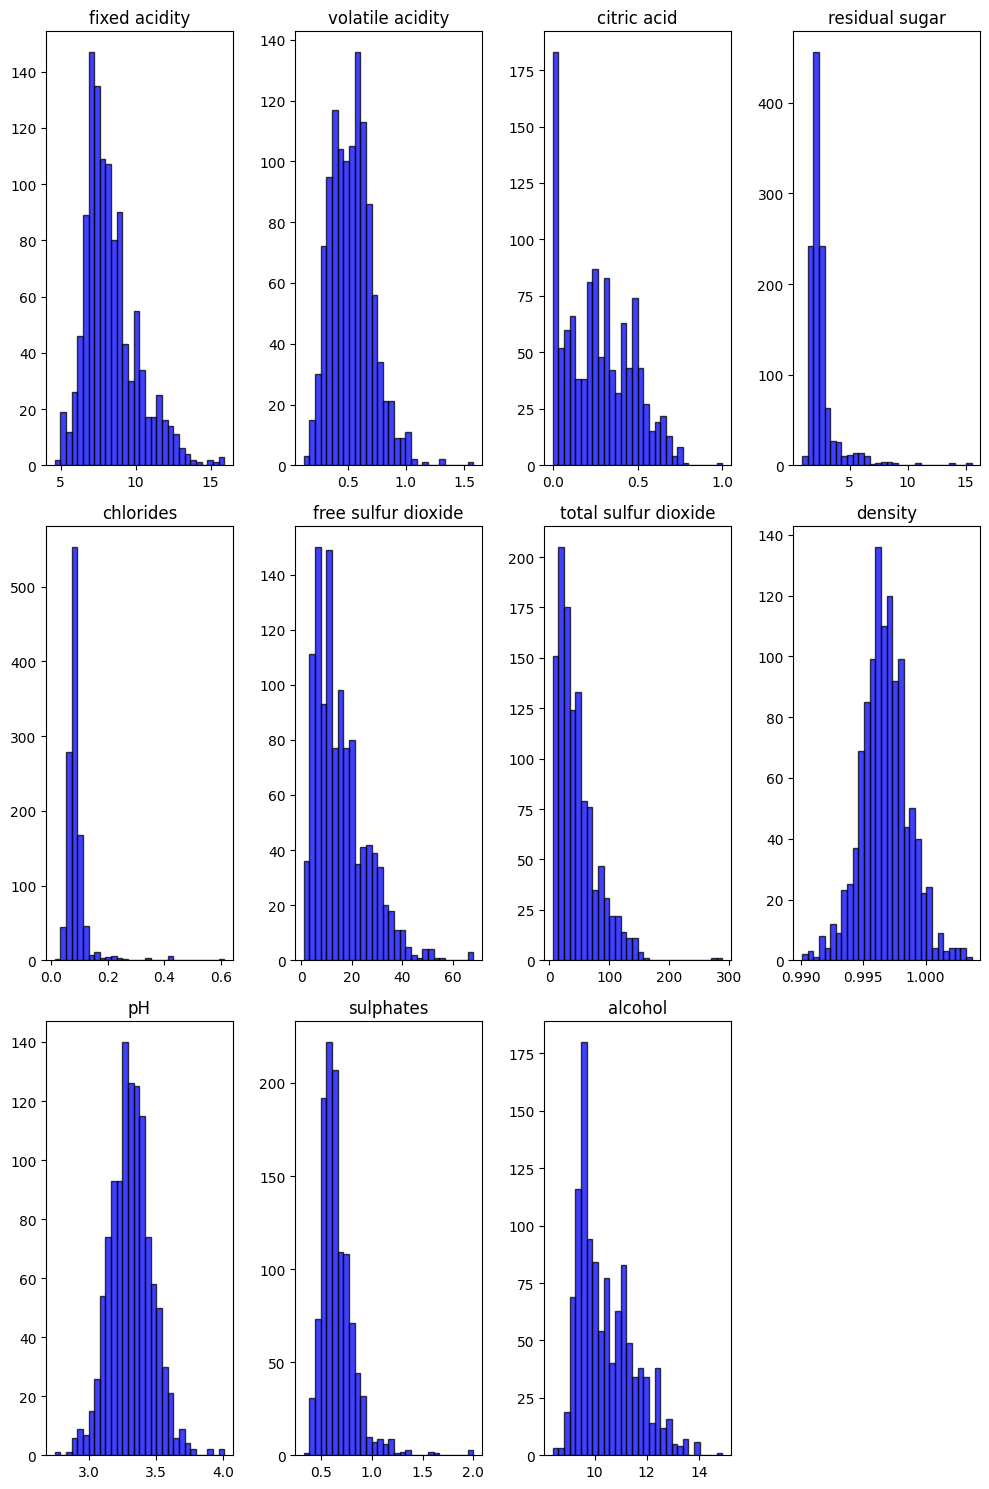

In [71]:
# removing Id and quality columns
columns_to_plot = [col for col in chemical_properties_df.columns if col not in ['Id', 'quality']]


# creating a figure and axes for the subplots
fig, axes = plt.subplots(3, 4, figsize=(10, 15))

# axes flatten for easy iteration
axes = axes.flatten()

# plotting histograms for each column in the selected columns
for i, col in enumerate(columns_to_plot):
    axes[i].hist(chemical_properties_df[col], bins=30, alpha=0.75, color='blue', edgecolor='black')
    axes[i].set_title(col)

# removnig empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# adjusting layout 
plt.tight_layout()
plt.show()


# Question 3.2

### By looking at the histograms, the following observations can be made:  

#### Fixed Acidity: Positively skewed (right-skewed)
#### Volatile Acidity: Positively skewed (right-skewed) 
#### Citric Acid: Positively skewed (right-skewed)             
#### Residual Sugar: Strongly positively skewed (right-skewed)        
#### Chlorides: Strongly positively skewed (right-skewed)              
#### Free Sulfur dioxide: Positively skewed (right-skewed)     
#### Total Sulfur dioxide: Positively skewed (right-skewed)    
#### Density: Approximately symmetric            
#### pH: Approximately symmetric               
#### Sulphates: Positively skewed (right-skewed)     
#### Alcohol: Positively skewed (right-skewed)   

#### Overall, most chemical property distributions show positive skewness, clustering at the lower end with a long tail extending to higher values. In contrast, the distributions for density and pH are approximately symmetric, with central peaks and tails of similar length on both sides.

# Question 3.3

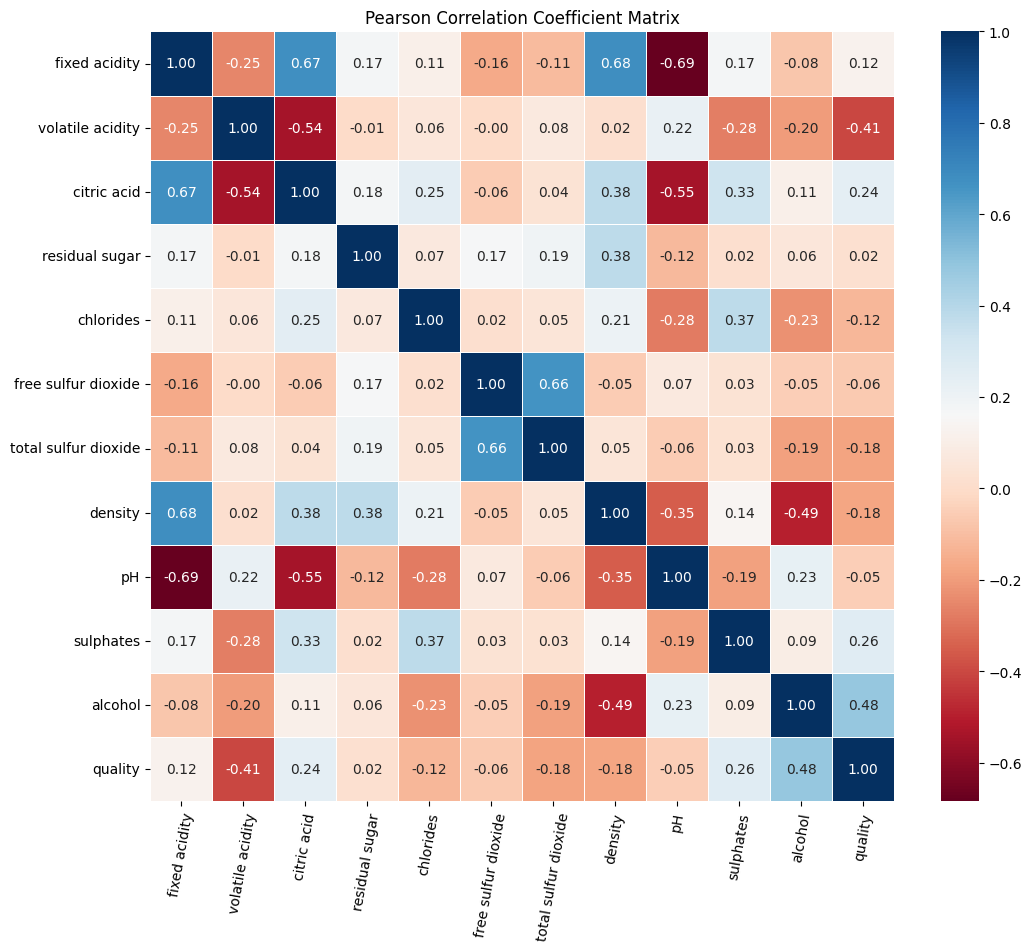

In [72]:
chemical_properties_df = pd.read_csv(file_path)

# removing Id column
chemical_properties_df = chemical_properties_df.drop(columns=['Id'])

# calculating pearson's correlation coefficient matrix
correlation_matrix = chemical_properties_df.corr()

# creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu', linewidths=0.5)
plt.title('Pearson Correlation Coefficient Matrix')
plt.xticks(rotation=80)

plt.show()

# Question 3.4

In [73]:
# extracting the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# unstacking the matrix to get variable pairs
pairs = upper_triangle.unstack().dropna()

# sorting the pairs by correlation value
sorted_pairs = pairs.sort_values(ascending=False)

# getting top 5 positive correlations
top_5_positive = sorted_pairs.head(5)

# getting top 5 negative correlations
top_5_negative = sorted_pairs.tail(5)

print("Top 5 Positive Correlations:\n", top_5_positive)
print("\nTop 5 Negative Correations:\n", top_5_negative)

Top 5 Positive Correlations:
 density               fixed acidity          0.681501
citric acid           fixed acidity          0.673157
total sulfur dioxide  free sulfur dioxide    0.661093
quality               alcohol                0.484866
density               residual sugar         0.380147
dtype: float64

Top 5 Negative Correations:
 quality      volatile acidity   -0.407394
alcohol      density            -0.494727
citric acid  volatile acidity   -0.544187
pH           citric acid        -0.546339
             fixed acidity      -0.685163
dtype: float64


# Question 3.5

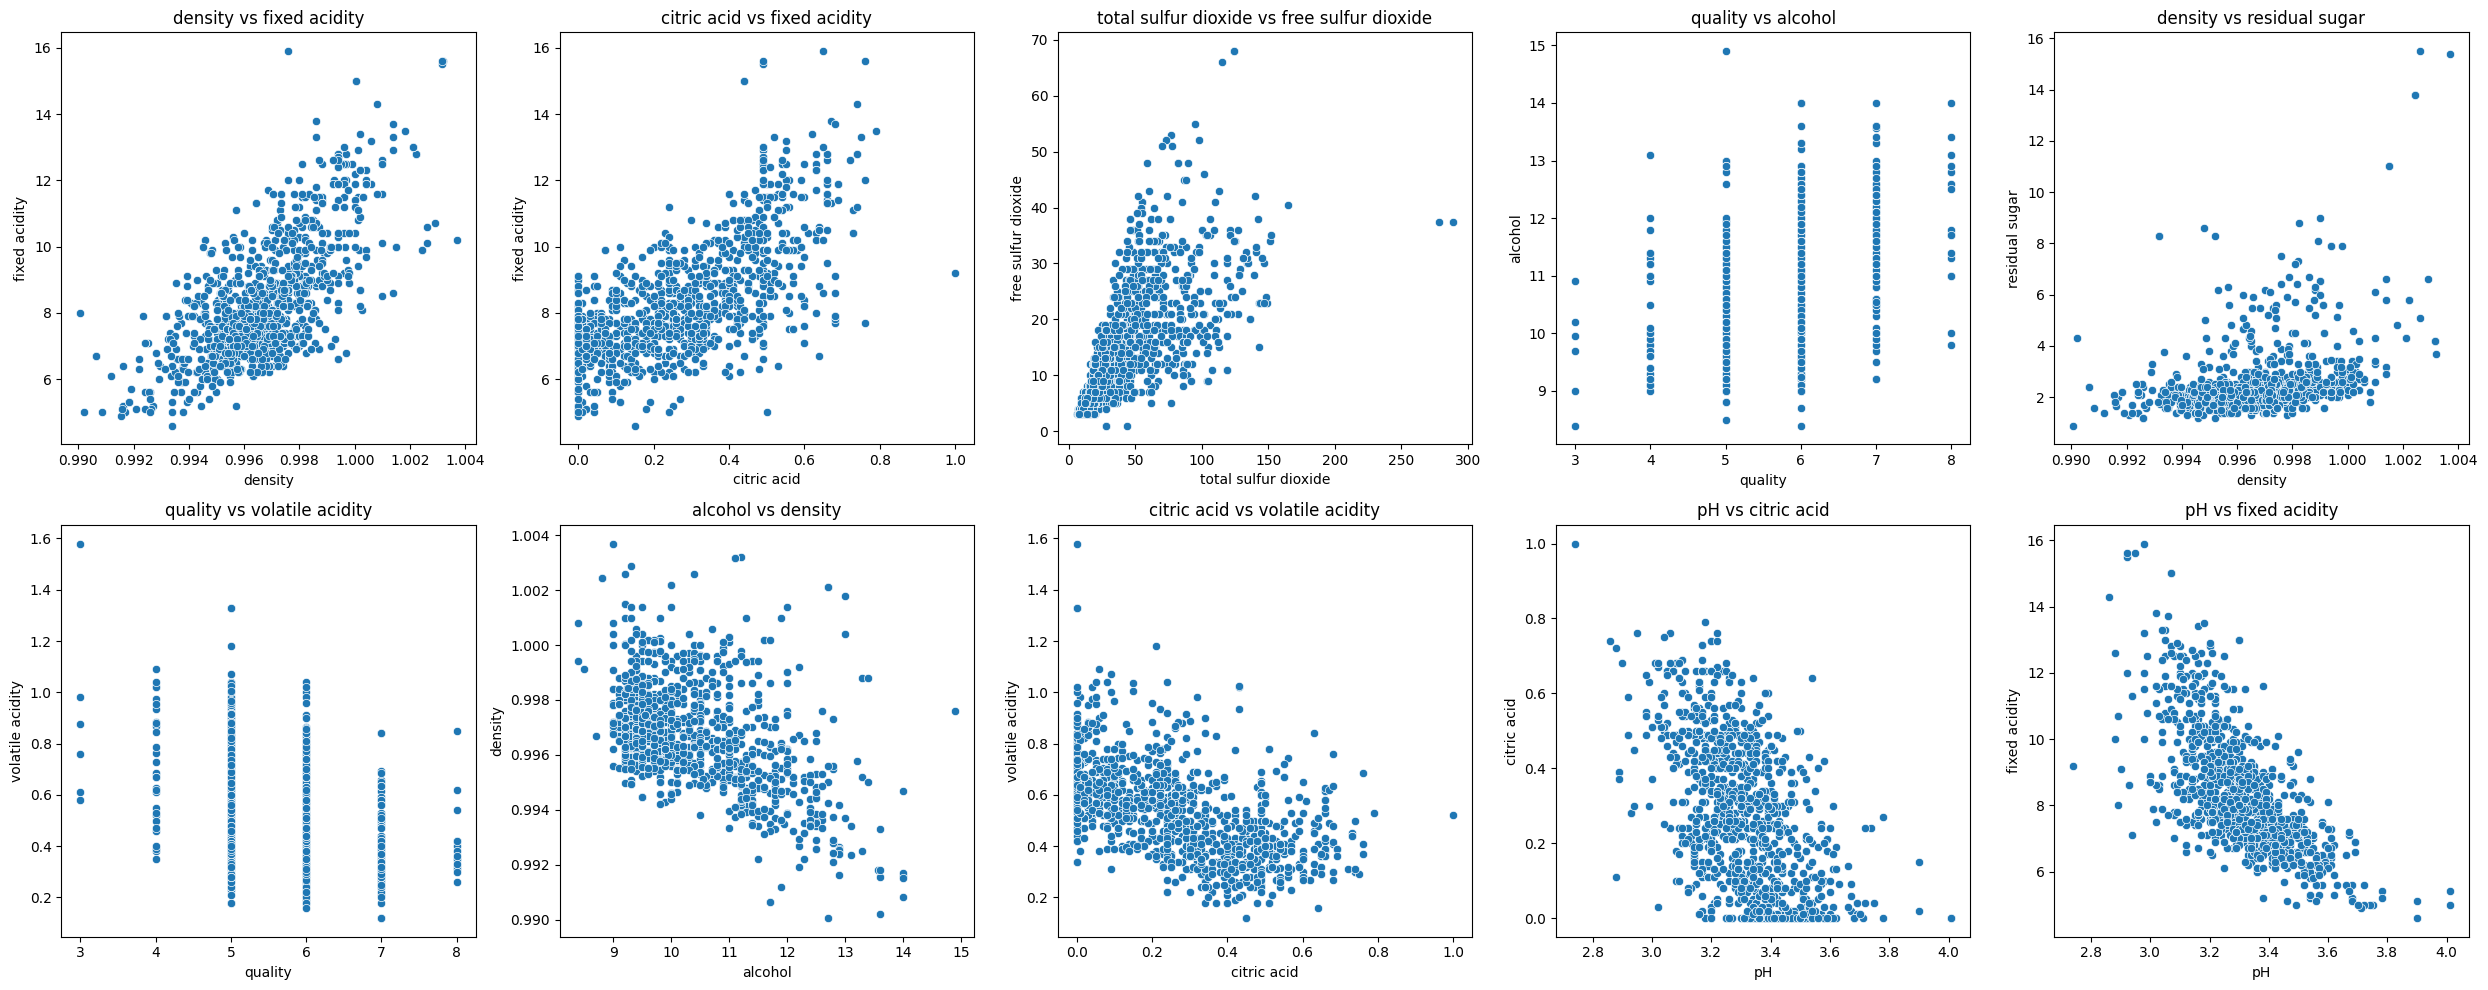

In [74]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10))

# plotting top 5 positive correlations (1st row)
for i, (pair, _) in enumerate(top_5_positive.items()):
    sns.scatterplot(x=chemical_properties_df[pair[0]], y=chemical_properties_df[pair[1]], ax=axes[0, i])
    axes[0, i].set_title(f'{pair[0]} vs {pair[1]}')

# plotting top 5 negative correlations (2nd row)
for i, (pair, _) in enumerate(top_5_negative.items()):
    sns.scatterplot(x=chemical_properties_df[pair[0]], y=chemical_properties_df[pair[1]], ax=axes[1, i])
    axes[1, i].set_title(f'{pair[0]} vs {pair[1]}')

plt.tight_layout()
plt.show()